API Link: https://FMendes13-getaround-api.hf.space/

# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import mlflow
import mlflow.sklearn

from sklearn.ensemble import RandomForestRegressor
import joblib

import requests

# Source Check

In [18]:
get_around_data=pd.read_csv('MACHINE_LEARNING_get_around_pricing_project.csv')
get_around_data.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
get_around_data.tail()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
4838,4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151
4842,4842,Audi,195840,160,diesel,grey,van,True,True,False,False,True,False,True,124


In [5]:
get_around_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
print('Dataset shape:')
display(get_around_data.shape)
print('\n')

print('Basics statistics:')
display(get_around_data.info())
print('\n')
display(get_around_data.describe(include='all'))
print('\n')

print('Percentage of missing values:')
display(100 * get_around_data.isnull().sum() / get_around_data.shape[0])

Dataset shape:


(4843, 14)



Basics statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null  

None

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000




Percentage of missing values:


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

# EDA

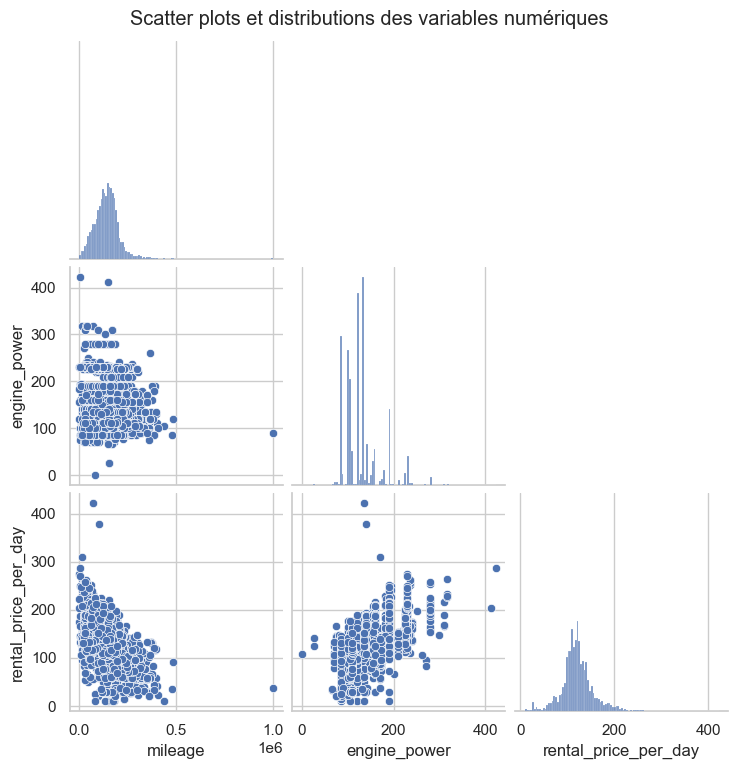

In [7]:
# Reconvertir les colonnes numériques proprement
get_around_data["mileage"] = pd.to_numeric(get_around_data["mileage"], errors="coerce")
get_around_data["engine_power"] = pd.to_numeric(get_around_data["engine_power"], errors="coerce")
get_around_data["rental_price_per_day"] = pd.to_numeric(get_around_data["rental_price_per_day"], errors="coerce")

# Nouveau pairplot en utilisant 'hist' sur la diagonale pour éviter l'erreur
sns.set(style="whitegrid")
numeric_features = ['mileage', 'engine_power', 'rental_price_per_day']
sns.pairplot(get_around_data[numeric_features].dropna(), corner=True, diag_kind='hist')

plt.suptitle("Scatter plots et distributions des variables numériques", y=1.02)
plt.show()

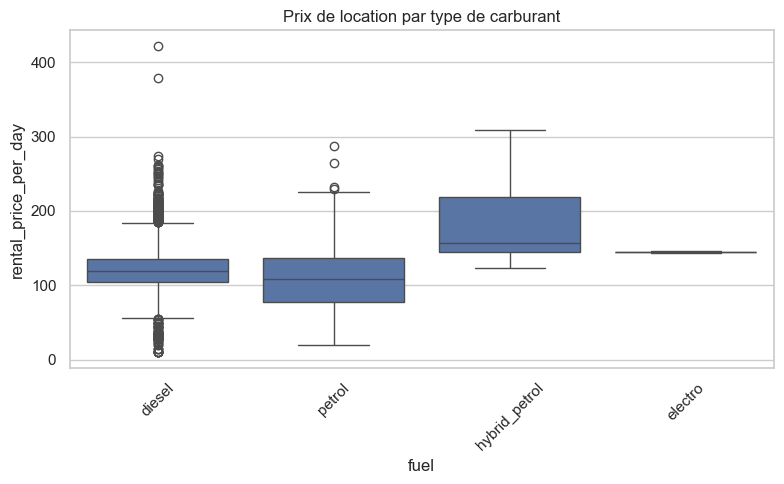

In [8]:
df_clean = get_around_data.dropna(subset=["rental_price_per_day", "mileage", "fuel", "car_type", "has_air_conditioning"])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="fuel", y="rental_price_per_day")
plt.title("Prix de location par type de carburant")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

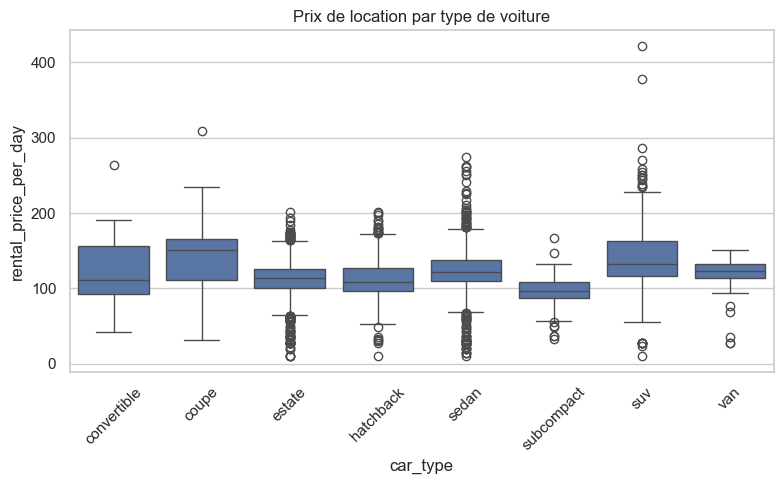

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="car_type", y="rental_price_per_day")
plt.title("Prix de location par type de voiture")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

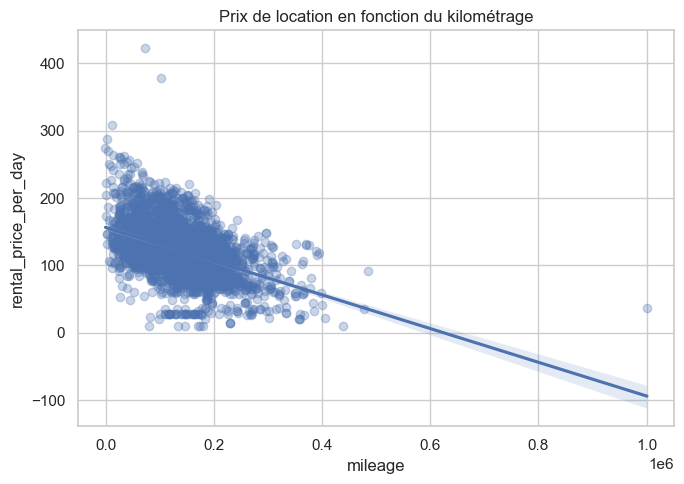

In [10]:
plt.figure(figsize=(7, 5))
sns.regplot(data=df_clean, x="mileage", y="rental_price_per_day", scatter_kws={'alpha':0.3})
plt.title("Prix de location en fonction du kilométrage")
plt.tight_layout()
plt.show()

# Model

In [11]:
get_around_data.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


## Pre Processing

In [12]:
# Separate target variable Y from features X
target_name = "rental_price_per_day"

print("Separating labels from features...")
Y = get_around_data.loc[:, target_name]
X = get_around_data.drop(target_name, axis=1)  # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True               

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
features = get_around_data.drop(columns=target_name)
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = features.select_dtypes(include=['object', 'bool']).columns.tolist()

In [15]:
preprocessor = ColumnTransformer(transformers=[
    ("num", "passthrough", numeric_features),
    ("cat", OneHotEncoder(drop='first',handle_unknown="ignore"), categorical_features)
])

## Base Model - Regression Linéaire & Evaluation

In [16]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  
print("...Done.")
print(
    X_test[0:5, :]
)
print()

Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color car_type  \
1215   Renault   119515           135  diesel        grey   estate   
432    Citroën   234365           135  diesel       black   estate   
4244       BMW    77356           105  diesel       black      suv   
289    Peugeot   181297           105  diesel       brown   estate   
2585   Citroën   144089           137  petrol       black    sedan   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1215                      False     True                 False          False   
432                        True     True                 False          False   
4244                      False     True                 False          False   
289                       False     True                 False          False   
2585                       True     True                 False          False   

      has_getaround_connect  has_speed_regulator  

In [17]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, y_train)  # Training is always done on train set !!
print("...Done.")

y_pred = model.predict(X_test)

Training model...
...Done.


In [18]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2, rmse

(0.653218772188439, 19.111206877530854)

## Random Forest 1

In [29]:
# Separate target variable Y from features X
target_name = "rental_price_per_day"

print("Separating labels from features...")
Y = get_around_data.loc[:, target_name]
X = get_around_data.drop(target_name, axis=1)  # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True               

In [30]:
cat_features = X.select_dtypes(include="object").columns.tolist()
bool_features = X.select_dtypes(include="bool").columns.tolist()
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

In [32]:
model_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
model_pipeline.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model_key', 'fuel',
                                                   'paint_color',
                                                   'car_type'])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [37]:
# 📈 Extraire l'importance des features
feature_names = model_pipeline.named_steps["preproc"].get_feature_names_out()
importances = model_pipeline.named_steps["rf"].feature_importances_
top_11_idx = np.argsort(importances)[-11:][::-1]
top_11_features = feature_names[top_11_idx]
top_11_features

array(['remainder__engine_power', 'remainder__mileage',
       'remainder__has_gps', 'remainder__has_getaround_connect',
       'cat__car_type_suv', 'cat__model_key_BMW',
       'cat__model_key_Citroën', 'cat__model_key_Mitsubishi',
       'remainder__automatic_car', 'remainder__winter_tires',
       'cat__paint_color_blue'], dtype=object)

In [39]:
# Nettoyage noms de features
top_11_cleaned = [feat.split('__')[1] if '__' in feat else feat for feat in top_11_features]
top_11_cleaned

['engine_power',
 'mileage',
 'has_gps',
 'has_getaround_connect',
 'car_type_suv',
 'model_key_BMW',
 'model_key_Citroën',
 'model_key_Mitsubishi',
 'automatic_car',
 'winter_tires',
 'paint_color_blue']

## Random Forest 2

In [9]:
# 🆕 Re-création d’un modèle uniquement avec ces 11 features
# Chargement des données
df = pd.read_csv("MACHINE_LEARNING_get_around_pricing_project.csv")

# Sélection des 11 features et la target
selected_features = [
    "mileage", "engine_power", "fuel", "paint_color", "car_type",
    "private_parking_available", "has_gps", "has_air_conditioning",
    "automatic_car", "has_getaround_connect", "has_speed_regulator"
]
target = "rental_price_per_day"

X = df[selected_features]
y = df[target]

# Préprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), ["mileage", "engine_power"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["fuel", "paint_color", "car_type"]),
    ("bool", "passthrough", [
        "private_parking_available", "has_gps", "has_air_conditioning",
        "automatic_car", "has_getaround_connect", "has_speed_regulator"
    ])
])

# Pipeline complet
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entraînement
model.fit(X, y)

# Sauvegarde
joblib.dump(model, "rf_model_top11.pkl")

['rf_model_top11.pkl']

# Test API

In [10]:
url = "https://FMendes13-getaround-api.hf.space/predict"
payload = {
    "input": [[170, 45000, 1, 1, 0, 0, 1, 0, 1, 1, 0]]
}

res = requests.post(url, json=payload)

print(res.status_code)
print(res.json())

200
{'error': "ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''"}


In [8]:
pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR